In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn

# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20220126_DAY27(1주차 모의경진대회)/train.csv')
df.head(10)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
5,0.1318,90000.0,3.48,7,0,0,2903,31,0,0,0,19548,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,7000,7000.0,0.0,1,7,236.47,0.854,0.0,0.0,1330.30,660,664,0
6,0.0791,60000.0,17.34,0,0,0,20399,35,0,0,0,117320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20000,20000.0,0.0,1,18,625.90,0.369,0.0,0.0,2567.44,750,754,0
7,0.0975,79600.0,15.97,3,0,1,6481,17,0,0,0,18757,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,23800,23800.0,0.0,1,7,765.17,0.745,0.0,0.0,3006.76,680,684,0
8,0.0789,150000.0,7.36,1,0,0,15827,38,0,0,543,367504,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,16000,16000.0,0.0,1,19,500.58,0.334,0.0,0.0,1286.38,665,669,0
9,0.0999,95000.0,25.78,0,1,0,17870,37,0,0,0,273776,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,24,258.10,0.764,0.0,0.0,796.59,665,669,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [19]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,0.065400,0.326240,0.089410,0.08058,0.059480,0.060710,0.046640,0.045320,0.045690,0.038570,0.075550,0.066410,0.000330,0.466120,0.000070,0.000050,0.110880,0.422550,0.321800,0.390200,0.288000,0.009620,0.226720,0.582810,0.0,0.060400,0.004250,0.019830,0.01101,0.007310,0.058200,0.000650,0.011250,0.007070,0.000880,0.434430,0.565570,0.489320,0.052360,0.060090,0.045700,0.050750,0.048560,0.051340,0.053430,0.048960,0.050030,0.049460,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,0.247232,0.468839,0.285336,0.27219,0.236522,0.238799,0.210868,0.208006,0.208813,0.192569,0.264278,0.248999,0.018163,0.498853,0.008366,0.007071,0.313985,0.493968,0.467169,0.487797,0.452833,0.097609,0.418712,0.493097,0.0,0.238228,0.065054,0.139417,0.10435,0.085186,0.234122,0.025487,0.105468,0.083786,0.029652,0.495684,0.495684,0.499888,0.222753,0.237655,0.208835,0.219488,0.214947,0.220691,0.224891,0.215786,0.218008,0.216828,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,

In [20]:
# 결측치 확인 -> 결측치 0
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
Non-Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


# Train Valid Split

In [21]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [22]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [23]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))

training set length : 80000
validation set length : 20000


In [24]:
# validation set의 라벨 비율 확인
y_valid.sum()/len(y_valid)

0.3253

# 데이터 전처리

In [25]:
# 컬럼 확인하기 -> 중복데이터 확인 -> 이름이 비슷한 columns 확인
X_train.columns  

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
 # 'emp_length1','emp_length2', 'emp_length3', 'emp_length4', 'emp_length5','emp_length6', 'emp_length7', 'emp_length8', 'emp_length9','emp_length10', 'emp_length11', 'emp_length12', 
 # 'home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4','home_ownership5', 'home_ownership6', 
 # 'verification_status1', 'verification_status2', 'verification_status3', 
 # 'purpose1', 'purpose2','purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13','purpose14',
 # 'initial_list_status1', 'initial_list_status2',
 # 'mths_since_last_delinq1', 'mths_since_last_delinq2','mths_since_last_delinq3', 'mths_since_last_delinq4', 'mths_since_last_delinq5', 'mths_since_last_delinq6','mths_since_last_delinq7', 'mths_since_last_delinq8',
 # 'mths_since_last_delinq9', 'mths_since_last_delinq10','mths_since_last_delinq11',
 
 # feature중 같은 속성을 가진 것들을 모아서 category값으로 변경

In [26]:

X_train['emp_length2'] = X_train['emp_length2'].replace([1],2)
X_train['emp_length3'] = X_train['emp_length3'].replace([1],3)
X_train['emp_length4'] = X_train['emp_length4'].replace([1],4)
X_train['emp_length5'] = X_train['emp_length5'].replace([1],5)
X_train['emp_length6'] = X_train['emp_length6'].replace([1],6)
X_train['emp_length7'] = X_train['emp_length7'].replace([1],7)
X_train['emp_length8'] = X_train['emp_length8'].replace([1],8)
X_train['emp_length9'] = X_train['emp_length9'].replace([1],9)
X_train['emp_length10'] = X_train['emp_length10'].replace([1],10)
X_train['emp_length11'] = X_train['emp_length11'].replace([1],11)
X_train['emp_length12'] = X_train['emp_length12'].replace([1],12)

In [27]:
#값이 잘 변경 됬는지 확인
X_train['emp_length9'].value_counts()

0    76330
9     3670
Name: emp_length9, dtype: int64

In [28]:
drop_columns = ['emp_length1','emp_length2','emp_length3','emp_length4','emp_length5','emp_length6','emp_length7','emp_length8','emp_length9', 'emp_length10', 'emp_length11', 'emp_length12']

X_train['emp_length'] = X_train.loc[:,drop_columns].sum(axis=1)
X_train['emp_length'].value_counts() # 13개의 feature 1개의 feature로 변경

2     26102
3      7112
4      6431
11     6082
12     5289
1      5274
6      4843
5      4775
7      3751
9      3670
8      3622
10     3049
Name: emp_length, dtype: int64

In [29]:
X_train = X_train.drop(columns= drop_columns, axis=1)

In [30]:
# 대체된 columns 삭제됬는지 확인
X_train.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       

In [31]:
drop_columns = ['home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6']

X_train['home_ownership2'] = X_train['home_ownership2'].replace([1],2)
X_train['home_ownership3'] = X_train['home_ownership3'].replace([1],3)
X_train['home_ownership4'] = X_train['home_ownership4'].replace([1],4)
X_train['home_ownership5'] = X_train['home_ownership5'].replace([1],5)
X_train['home_ownership6'] = X_train['home_ownership6'].replace([1],6)

X_train['home_ownership'] = X_train.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_train['home_ownership'].value_counts())

X_train = X_train.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
X_train.columns # 삭제가 잘됬는지 확인

2    37289
6    33835
5     8846
1       22
3        5
4        3
Name: home_ownership, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       'mths_since_last_delinq10', 'mths_since_last_delinq11', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 

In [32]:
drop_columns = ['verification_status1', 'verification_status2', 'verification_status3']

X_train['verification_status2'] = X_train['verification_status2'].replace([1],2)
X_train['verification_status3'] = X_train['verification_status3'].replace([1],3)


X_train['verification_status'] = X_train.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_train['verification_status'].value_counts())

X_train = X_train.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
X_train.columns # 삭제가 잘됬는지 확인

2    31164
1    25723
3    23113
Name: verification_status, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'purpose1',
       'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       'mths_since_last_delinq10', 'mths_since_last_delinq11', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
 

In [33]:
drop_columns = ['purpose1',
       'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14']

X_train['purpose2'] = X_train['purpose2'].replace([1],2)
X_train['purpose3'] = X_train['purpose3'].replace([1],3)
X_train['purpose4'] = X_train['purpose4'].replace([1],4)
X_train['purpose5'] = X_train['purpose5'].replace([1],5)
X_train['purpose6'] = X_train['purpose6'].replace([1],6)
X_train['purpose7'] = X_train['purpose7'].replace([1],7)
X_train['purpose8'] = X_train['purpose8'].replace([1],8)
X_train['purpose9'] = X_train['purpose9'].replace([1],9)
X_train['purpose10'] = X_train['purpose10'].replace([1],10)
X_train['purpose11'] = X_train['purpose11'].replace([1],11)
X_train['purpose12'] = X_train['purpose12'].replace([1],12)
X_train['purpose13'] = X_train['purpose13'].replace([1],13)
X_train['purpose14'] = X_train['purpose14'].replace([1],14)


X_train['purpose'] = X_train.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_train['purpose'].value_counts())

X_train = X_train.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
X_train.columns # 삭제가 잘됬는지 확인

3     46702
2     18156
5      4799
10     4674
7      1575
12      908
8       853
1       752
9       570
13      541
6       344
14       75
11       51
Name: purpose, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'emp_length', 'home_ownership',
       'verification_status', 'purpose'],
      dtype='object')

In [34]:
drop_columns = ['initial_list_status2']

X_train['initial_list_status2'] = X_train['initial_list_status2'].replace([1],2)

X_train['initial_list_status'] = X_train.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_train['initial_list_status'].value_counts())

X_train = X_train.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
X_train.columns # 삭제가 잘됬는지 확인

2    45102
0    34898
Name: initial_list_status, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'initial_list_status1', 'mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       'mths_since_last_delinq10', 'mths_since_last_delinq11', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high', 'emp_length',
       'home_ownership', 'verification_status', 'purpose',
       'initial_list_status'],
      dtype='object')

In [35]:
drop_columns = ['mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11']

X_train['mths_since_last_delinq2'] = X_train['mths_since_last_delinq2'].replace([1],2)
X_train['mths_since_last_delinq3'] = X_train['mths_since_last_delinq3'].replace([1],3)
X_train['mths_since_last_delinq4'] = X_train['mths_since_last_delinq4'].replace([1],4)
X_train['mths_since_last_delinq5'] = X_train['mths_since_last_delinq5'].replace([1],5)
X_train['mths_since_last_delinq6'] = X_train['mths_since_last_delinq6'].replace([1],6)
X_train['mths_since_last_delinq7'] = X_train['mths_since_last_delinq7'].replace([1],7)
X_train['mths_since_last_delinq8'] = X_train['mths_since_last_delinq8'].replace([1],8)
X_train['mths_since_last_delinq9'] = X_train['mths_since_last_delinq9'].replace([1],9)
X_train['mths_since_last_delinq10'] = X_train['mths_since_last_delinq10'].replace([1],10)
X_train['mths_since_last_delinq11'] = X_train['mths_since_last_delinq11'].replace([1],11)


X_train['mths_since_last_delinq'] = X_train.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_train['mths_since_last_delinq'].value_counts())

X_train = X_train.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
X_train.columns # 삭제가 잘됬는지 확인

1     39223
3      4798
8      4238
2      4210
7      4071
5      4047
10     3995
11     3955
9      3922
6      3848
4      3693
Name: mths_since_last_delinq, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'initial_list_status1', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'mths_since_last_delinq'],
      dtype='object')

In [36]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

# X_valid data 전처리 (=X_train data)



In [38]:
X_valid.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [39]:
X_valid['emp_length2'] = X_valid['emp_length2'].replace([1],2)
X_valid['emp_length3'] = X_valid['emp_length3'].replace([1],3)
X_valid['emp_length4'] = X_valid['emp_length4'].replace([1],4)
X_valid['emp_length5'] = X_valid['emp_length5'].replace([1],5)
X_valid['emp_length6'] = X_valid['emp_length6'].replace([1],6)
X_valid['emp_length7'] = X_valid['emp_length7'].replace([1],7)
X_valid['emp_length8'] = X_valid['emp_length8'].replace([1],8)
X_valid['emp_length9'] = X_valid['emp_length9'].replace([1],9)
X_valid['emp_length10'] = X_valid['emp_length10'].replace([1],10)
X_valid['emp_length11'] = X_valid['emp_length11'].replace([1],11)
X_valid['emp_length12'] = X_valid['emp_length12'].replace([1],12)

drop_columns = ['emp_length1','emp_length2','emp_length3','emp_length4','emp_length5','emp_length6','emp_length7','emp_length8','emp_length9', 'emp_length10', 'emp_length11', 'emp_length12']

X_valid['emp_length'] = X_valid.loc[:,drop_columns].sum(axis=1)
print(X_valid['emp_length'].value_counts())

X_valid = X_valid.drop(columns= drop_columns, axis=1)

2     6522
3     1829
4     1627
11    1473
12    1352
1     1266
6     1228
5     1173
7      913
8      910
9      899
10     808
Name: emp_length, dtype: int64


In [40]:
drop_columns = ['home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6']

X_valid['home_ownership2'] = X_valid['home_ownership2'].replace([1],2)
X_valid['home_ownership3'] = X_valid['home_ownership3'].replace([1],3)
X_valid['home_ownership4'] = X_valid['home_ownership4'].replace([1],4)
X_valid['home_ownership5'] = X_valid['home_ownership5'].replace([1],5)
X_valid['home_ownership6'] = X_valid['home_ownership6'].replace([1],6)

X_valid['home_ownership'] = X_valid.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_valid['home_ownership'].value_counts())

X_valid = X_valid.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제

2    9323
6    8420
5    2242
1      11
4       2
3       2
Name: home_ownership, dtype: int64


In [41]:
drop_columns = ['verification_status1', 'verification_status2', 'verification_status3']

X_valid['verification_status2'] = X_valid['verification_status2'].replace([1],2)
X_valid['verification_status3'] = X_valid['verification_status3'].replace([1],3)


X_valid['verification_status'] = X_valid.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_valid['verification_status'].value_counts())

X_valid = X_valid.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제

2    7856
1    6457
3    5687
Name: verification_status, dtype: int64


In [42]:
drop_columns = ['purpose1',
       'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14']

X_valid['purpose2'] = X_valid['purpose2'].replace([1],2)
X_valid['purpose3'] = X_valid['purpose3'].replace([1],3)
X_valid['purpose4'] = X_valid['purpose4'].replace([1],4)
X_valid['purpose5'] = X_valid['purpose5'].replace([1],5)
X_valid['purpose6'] = X_valid['purpose6'].replace([1],6)
X_valid['purpose7'] = X_valid['purpose7'].replace([1],7)
X_valid['purpose8'] = X_valid['purpose8'].replace([1],8)
X_valid['purpose9'] = X_valid['purpose9'].replace([1],9)
X_valid['purpose10'] = X_valid['purpose10'].replace([1],10)
X_valid['purpose11'] = X_valid['purpose11'].replace([1],11)
X_valid['purpose12'] = X_valid['purpose12'].replace([1],12)
X_valid['purpose13'] = X_valid['purpose13'].replace([1],13)
X_valid['purpose14'] = X_valid['purpose14'].replace([1],14)


X_valid['purpose'] = X_valid.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_valid['purpose'].value_counts())

X_valid = X_valid.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제


3     11579
2      4516
5      1241
10     1146
7       408
8       248
12      217
1       210
13      166
9       161
6        81
11       14
14       13
Name: purpose, dtype: int64


In [43]:
drop_columns = ['initial_list_status2']

X_valid['initial_list_status2'] = X_valid['initial_list_status2'].replace([1],2)

X_valid['initial_list_status'] = X_valid.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_valid['initial_list_status'].value_counts())

X_valid = X_valid.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제


2    11455
0     8545
Name: initial_list_status, dtype: int64


In [44]:
drop_columns = ['mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11']

X_valid['mths_since_last_delinq2'] = X_valid['mths_since_last_delinq2'].replace([1],2)
X_valid['mths_since_last_delinq3'] = X_valid['mths_since_last_delinq3'].replace([1],3)
X_valid['mths_since_last_delinq4'] = X_valid['mths_since_last_delinq4'].replace([1],4)
X_valid['mths_since_last_delinq5'] = X_valid['mths_since_last_delinq5'].replace([1],5)
X_valid['mths_since_last_delinq6'] = X_valid['mths_since_last_delinq6'].replace([1],6)
X_valid['mths_since_last_delinq7'] = X_valid['mths_since_last_delinq7'].replace([1],7)
X_valid['mths_since_last_delinq8'] = X_valid['mths_since_last_delinq8'].replace([1],8)
X_valid['mths_since_last_delinq9'] = X_valid['mths_since_last_delinq9'].replace([1],9)
X_valid['mths_since_last_delinq10'] = X_valid['mths_since_last_delinq10'].replace([1],10)
X_valid['mths_since_last_delinq11'] = X_valid['mths_since_last_delinq11'].replace([1],11)


X_valid['mths_since_last_delinq'] = X_valid.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(X_valid['mths_since_last_delinq'].value_counts())

X_valid = X_valid.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
X_valid.columns # 삭제가 잘됬는지 확인

1     9709
3     1211
8     1105
7     1063
5     1028
2     1026
10    1008
6     1008
11     991
9      974
4      877
Name: mths_since_last_delinq, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'initial_list_status1', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'mths_since_last_delinq'],
      dtype='object')


정확도: 0.7426
정밀도: 0.6942
재현율: 0.3790
AUC: 0.6490
F1: 0.4903


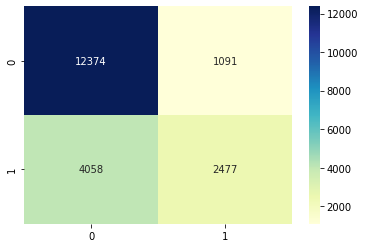

In [ ]:
# RandomForest test
rnd_clf = RandomForestClassifier(max_depth = 20)

rnd_clf.fit(X_train, y_train)
y_pred_rnd = rnd_clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_rnd)

In [ ]:
# xgb 최적 파라미터 탐색

xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth': [ 2, 3, 4, 5, 6 ],
              'n_estimators':[50, 100]
              }


cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

{'max_depth': 6, 'n_estimators': 100}


정확도: 0.7529
정밀도: 0.6813
재현율: 0.4580
AUC: 0.6770
F1: 0.5478


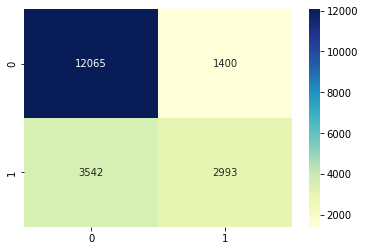

In [ ]:
# best parameter를 사용하여 prediction 수행
# {'max_depth': 6, 'n_estimators': 100}
xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
                                n_estimators = results.best_params_['n_estimators'],
                                eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_xgb)


정확도: 0.7554
정밀도: 0.6600
재현율: 0.5175
AUC: 0.6941
F1: 0.5801


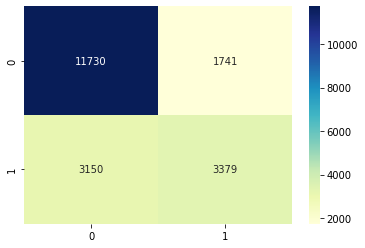

In [ ]:
#LGBM test
lgbm_clf = LGBMClassifier(max_depth=15,
                                  num_leaves =150)

lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_lgbm)

In [ ]:
# parameter 7,70
정확도: 0.7551 
정밀도: 0.6689
재현율: 0.4946
AUC: 0.6880
F1: 0.5687

# parameter 8,80
정확도: 0.7555
정밀도: 0.6672
재현율: 0.5008
AUC: 0.6899
F1: 0.5722

# Ensemble(Voting)

In [ ]:

# rnd_clf  = RandomForestClassifier()
# lgbm_clf = LGBMClassifier()
# rid_clf = RidgeClassifier()
# dtc_clf = DecisionTreeClassifier()
# svm_clf = SVC()
# ada_clf = AdaBoostClassifier()
# gbc_clf = GradientBoostingClassifier()
# bag_clf = BaggingClassifier()
# ext_clf = ExtraTreesClassifier()
# knn_clf = KNeighborsClassifier()
# svc_clf = SVC()

rnd_clf = RandomForestClassifier(max_depth = 20)
xgb_clf = xgboost.XGBClassifier(max_depth = 6,
                                n_estimators = 100,
                                eval_metric='mlogloss')
lgbm_clf = LGBMClassifier(max_depth=15,
                                  num_leaves =150)


voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], voting='soft')


정확도: 0.6726
정밀도: 0.0000
재현율: 0.0000
AUC: 0.4999
F1: 0.0000


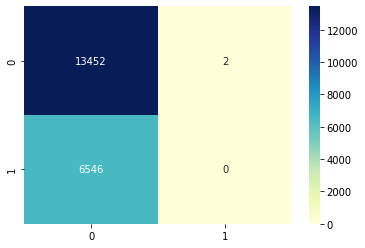

In [ ]:
for clf in (rnd_clf, lgbm_clf, svm_clf) :
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)

# Ensemble(Stacking)


정확도: 0.7559
정밀도: 0.6548
재현율: 0.5335
AUC: 0.6986
F1: 0.5879


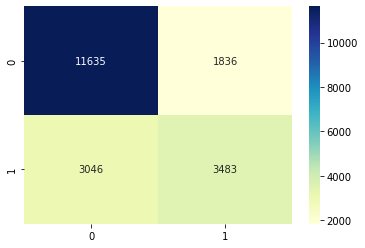

In [ ]:
rnd_clf = RandomForestClassifier(max_depth = 20)
xgb_clf = xgboost.XGBClassifier(max_depth = 6,
                                n_estimators = 100,
                                eval_metric='mlogloss')
lgbm_clf = LGBMClassifier(max_depth=15,
                                  num_leaves =150)


stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf),('lgbm', lgbm_clf), ('xgb', xgb_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

In [ ]:
  submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20220126_DAY27(1주차 모의경진대회)/sample_submission.csv')

# prediction 수행
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20220126_DAY27(1주차 모의경진대회)/test.csv')

In [ ]:
df_test['emp_length2'] = df_test['emp_length2'].replace([1],2)
df_test['emp_length3'] = df_test['emp_length3'].replace([1],3)
df_test['emp_length4'] = df_test['emp_length4'].replace([1],4)
df_test['emp_length5'] = df_test['emp_length5'].replace([1],5)
df_test['emp_length6'] = df_test['emp_length6'].replace([1],6)
df_test['emp_length7'] = df_test['emp_length7'].replace([1],7)
df_test['emp_length8'] = df_test['emp_length8'].replace([1],8)
df_test['emp_length9'] = df_test['emp_length9'].replace([1],9)
df_test['emp_length10'] = df_test['emp_length10'].replace([1],10)
df_test['emp_length11'] = df_test['emp_length11'].replace([1],11)
df_test['emp_length12'] = df_test['emp_length12'].replace([1],12)

drop_columns = ['emp_length1','emp_length2','emp_length3','emp_length4','emp_length5','emp_length6','emp_length7','emp_length8','emp_length9', 'emp_length10', 'emp_length11', 'emp_length12']

df_test['emp_length'] = df_test.loc[:,drop_columns].sum(axis=1)
print(df_test['emp_length'].value_counts())

df_test = df_test.drop(columns= drop_columns, axis=1)

2     11574
3      3286
4      2849
11     2702
12     2357
1      2301
6      2156
5      2128
9      1709
7      1687
8      1641
10     1426
Name: emp_length, dtype: int64


In [ ]:
drop_columns = ['home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6']

df_test['home_ownership2'] = df_test['home_ownership2'].replace([1],2)
df_test['home_ownership3'] = df_test['home_ownership3'].replace([1],3)
df_test['home_ownership4'] = df_test['home_ownership4'].replace([1],4)
df_test['home_ownership5'] = df_test['home_ownership5'].replace([1],5)
df_test['home_ownership6'] = df_test['home_ownership6'].replace([1],6)

df_test['home_ownership'] = df_test.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(df_test['home_ownership'].value_counts())

df_test = df_test.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제

2    16792
6    15054
5     3957
1        9
4        2
3        2
Name: home_ownership, dtype: int64


In [ ]:
drop_columns = ['verification_status1', 'verification_status2', 'verification_status3']

df_test['verification_status2'] = df_test['verification_status2'].replace([1],2)
df_test['verification_status3'] = df_test['verification_status3'].replace([1],3)


df_test['verification_status'] = df_test.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(df_test['verification_status'].value_counts())

df_test = df_test.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제

2    14020
1    11473
3    10323
Name: verification_status, dtype: int64


In [ ]:
drop_columns = ['purpose1',
       'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14']

df_test['purpose2'] = df_test['purpose2'].replace([1],2)
df_test['purpose3'] = df_test['purpose3'].replace([1],3)
df_test['purpose4'] = df_test['purpose4'].replace([1],4)
df_test['purpose5'] = df_test['purpose5'].replace([1],5)
df_test['purpose6'] = df_test['purpose6'].replace([1],6)
df_test['purpose7'] = df_test['purpose7'].replace([1],7)
df_test['purpose8'] = df_test['purpose8'].replace([1],8)
df_test['purpose9'] = df_test['purpose9'].replace([1],9)
df_test['purpose10'] = df_test['purpose10'].replace([1],10)
df_test['purpose11'] = df_test['purpose11'].replace([1],11)
df_test['purpose12'] = df_test['purpose12'].replace([1],12)
df_test['purpose13'] = df_test['purpose13'].replace([1],13)
df_test['purpose14'] = df_test['purpose14'].replace([1],14)


df_test['purpose'] = df_test.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(df_test['purpose'].value_counts())

df_test = df_test.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제

3     20956
2      7897
5      2189
10     2104
7       748
8       421
1       371
12      370
9       307
13      246
6       153
14       32
11       22
Name: purpose, dtype: int64


In [ ]:
drop_columns = ['initial_list_status2']

df_test['initial_list_status2'] = df_test['initial_list_status2'].replace([1],2)

df_test['initial_list_status'] = df_test.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(df_test['initial_list_status'].value_counts())

df_test = df_test.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제

2    20245
0    15571
Name: initial_list_status, dtype: int64


In [ ]:
drop_columns = ['mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11']

df_test['mths_since_last_delinq2'] = df_test['mths_since_last_delinq2'].replace([1],2)
df_test['mths_since_last_delinq3'] = df_test['mths_since_last_delinq3'].replace([1],3)
df_test['mths_since_last_delinq4'] = df_test['mths_since_last_delinq4'].replace([1],4)
df_test['mths_since_last_delinq5'] = df_test['mths_since_last_delinq5'].replace([1],5)
df_test['mths_since_last_delinq6'] = df_test['mths_since_last_delinq6'].replace([1],6)
df_test['mths_since_last_delinq7'] = df_test['mths_since_last_delinq7'].replace([1],7)
df_test['mths_since_last_delinq8'] = df_test['mths_since_last_delinq8'].replace([1],8)
df_test['mths_since_last_delinq9'] = df_test['mths_since_last_delinq9'].replace([1],9)
df_test['mths_since_last_delinq10'] = df_test['mths_since_last_delinq10'].replace([1],10)
df_test['mths_since_last_delinq11'] = df_test['mths_since_last_delinq11'].replace([1],11)


df_test['mths_since_last_delinq'] = df_test.loc[:,drop_columns].sum(axis=1) # 컬럼 합치기
print(df_test['mths_since_last_delinq'].value_counts())

df_test = df_test.drop(columns= drop_columns, axis=1) # 대체된 컬럼 삭제
df_test.columns # 삭제가 잘됬는지 확인

1     17595
3      2090
2      1949
11     1861
7      1861
5      1825
8      1768
6      1731
9      1721
4      1711
10     1704
Name: mths_since_last_delinq, dtype: int64


Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'initial_list_status1', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'ID', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'mths_since_last_delinq'],
      dtype='object')

In [ ]:
df_test.columns 

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'initial_list_status1', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'ID', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'mths_since_last_delinq'],
      dtype='object')

# Submission

In [ ]:
# 제출 양식 다운로드

submit['answer'] = stacking_clf.predict(df_test.drop(columns=['ID']))

# 제출 파일 저장
